# Protein Kenetic Stability Prediction 

# Life cycle of  Project

* **Understanding the Problem Statement**

* **Data Collection**

* **Data Checks to perform**

* **Exploratory data analysis**

* **Data Pre-Processing**

* **Model Training**

* **Cross validation**


* ****

# 1
## 1.1 Import Data and Required Packages


In [441]:
# Basic Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
import sklearn

# Configuration
%matplotlib inline
warnings.filterwarnings('ignore')

# Imports for model training and validation
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from mlxtend.evaluate import mcnemar, mcnemar_table
from sklearn.naive_bayes import MultinomialNB,GaussianNB 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import LeaveOneOut
from sklearn.decomposition import KernelPCA



# 1.2 Making Datasets 

## 1.2.1 Stractural Features
## Dataset 1

In [442]:
data = pd.read_csv('data/labeled_data.csv')
data.head()


,PDB,No. a.a.,Glycine,S.S.,Long SS,Charge,SASA,No. pos.,No. Surf. pos.,Pos. area,...,No. Surf. neg.,Neg. area,No. hyd.,No. Surf. hyd.,hyd. area,Alpha,Beta,Salt bridges,H-bonds,SDS Stable
0,2H5C,198,32,3.0,2,8,7863.049316,14,13,1202.166504,...,4,246.944275,75,47,1929.952759,9.595960,52.525253,8,213,0
1,5JVI,316,36,0.0,N,-10,12592.415039,21,21,1708.759888,...,26,1090.533569,127,74,3567.560303,48.101266,17.405063,1,3,0
2,2V1F,153,15,0.0,N,0,8144.530273,21,21,1973.160889,...,21,1814.241211,61,49,1495.550049,87.581699,0.000000,1,1,1
3,1B9O,123,6,4.0,4,-8,7029.185059,13,13,1405.147583,...,21,1874.586426,46,36,1701.761353,43.089431,4.878049,6,140,1
4,2PWA,279,33,2.0,2,1,10385.035156,20,20,1764.792358,...,18,901.254578,107,55,2552.219971,32.258065,22.580645,1,3,0


In [443]:
#check the data features name
data.columns

Index(['PDB', 'No. a.a.', 'Glycine', 'S.S.', 'Long SS', 'Charge', 'SASA',
       'No. pos.', 'No. Surf. pos.', 'Pos. area', 'No. neg.', 'No. Surf. neg.',
       'Neg. area', 'No. hyd.', 'No. Surf. hyd.', 'hyd. area', 'Alpha', 'Beta',
       'Salt bridges', 'H-bonds', 'SDS Stable'],
      dtype='object')

# 1.2.2 Embeddings

## Dataset 2 

In [453]:
dataset2 = pd.read_csv('data/dataset2.csv')
dataset2.head()


,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-0.106052,-0.028277,-0.049900,-0.048172,-0.022454,-0.094518,-0.061531,0.153645,0.061776,-0.111622,...,0.154779,0.000940,-0.012216,-0.037772,0.071069,0.011423,0.039311,-0.051318,-0.138031,-0.068270
1,-0.030346,0.015794,-0.038204,-0.069977,0.002786,-0.097417,-0.018056,0.138168,0.107735,-0.021421,...,-0.009343,-0.137165,0.070771,-0.039607,-0.011787,-0.077273,0.020558,0.014838,-0.122289,-0.059000
2,0.048114,-0.019850,-0.035541,-0.012063,-0.046040,-0.005736,-0.100301,0.032832,0.075569,-0.059691,...,0.086863,-0.108787,0.040456,-0.013540,0.002605,0.025393,0.053454,0.048783,-0.092088,-0.026373
3,-0.070998,0.039915,0.012892,-0.073913,0.015845,-0.079292,-0.015932,0.098513,0.058595,0.006227,...,0.018793,-0.004514,0.010956,0.013707,0.003797,0.046510,0.055690,-0.009589,-0.178329,-0.030247
4,0.007949,0.030922,-0.084674,-0.069309,-0.037835,-0.033629,-0.046397,0.229970,0.048101,-0.107052,...,0.144373,-0.057360,0.091397,-0.017375,0.138946,-0.051818,-0.002533,-0.015262,-0.105503,-0.055646


### Dataset_ unlabeled 2 

In [461]:
dataset2_unlabeled = pd.read_csv('data/esm2_unlabeled.csv')
dataset2_unlabeled.head()

,0,1,2,3,4,5,6,7,8,9,...,2550,2551,2552,2553,2554,2555,2556,2557,2558,2559
0,-0.146392,-0.044388,-0.073572,-0.083538,0.013867,-0.115059,-0.021020,0.251900,0.082191,-0.110854,...,0.104507,-0.209106,0.026390,-0.034675,0.164679,-0.046357,-0.086354,0.092409,-0.050137,-0.178787
1,-0.097094,0.003643,-0.010534,-0.083778,0.009176,-0.063397,-0.049395,0.153481,0.013189,-0.057253,...,0.057338,-0.095117,0.106728,-0.085964,0.067033,0.001800,0.046425,0.032737,-0.098372,-0.114315
2,0.005237,-0.020602,-0.002926,-0.080908,0.027083,0.034999,-0.044002,0.044819,0.000701,-0.027679,...,0.055709,-0.095342,0.042804,-0.025231,0.053732,-0.037928,0.064099,0.038445,-0.057057,-0.022486
3,-0.012934,-0.014526,-0.105428,-0.010334,-0.017943,-0.113075,0.023310,0.148012,0.044867,-0.084258,...,0.115832,-0.082564,0.045533,-0.065703,0.012751,-0.011484,0.043135,0.027399,-0.050511,-0.100954
4,0.027225,-0.053654,-0.052486,-0.090339,0.027644,-0.001249,-0.029163,0.170268,0.087543,-0.038012,...,0.063100,-0.113716,0.046959,-0.027659,0.130872,-0.057488,0.032790,0.111607,-0.140744,-0.089814


## Transform highdimentional features into low dimention al features 
## Here here 238 number of  PCA components is chosen as they exåplain 80 percent of the data varience

In [462]:

# number of PCA
pca = PCA(n_components=238)

# Initialize the StandardScaler to normalize features 
scaler = StandardScaler()

# Both dataset standardisation
X21_scaled = scaler.fit_transform(dataset2_unlabeled)
X22_scaled = scaler.transform(dataset2)

# Fit PCA on the first dataset(Dataset 2 unlabeled)
pca.fit(X21_scaled)

# Transform embeding datasets using the fitted PCA
#X1_transformed = pca.transform(X1_scaled)

X2_transformed = pca.transform(X2_scaled)


In [463]:
X2_transformed.shape

(51, 238)

# 1.2.3 Combination Dataset (Stractural features  and embedding dataset)

## Dataset 3


In [464]:
#Dataset o1
data1 = data.drop(['PDB', 'Long SS', 'SDS Stable'], axis=1) #drop PDB, Long SS and target feature SDS Stable

# Concatenate the DataFrames
dataset3 = pd.concat([data1, dataset2], axis = 1,ignore_index=True)
dataset3.head()

,0,1,2,3,4,5,6,7,8,9,...,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577
0,198,32,3.0,8,7863.049316,14,13,1202.166504,6,4,...,0.154779,0.000940,-0.012216,-0.037772,0.071069,0.011423,0.039311,-0.051318,-0.138031,-0.068270
1,316,36,0.0,-10,12592.415039,21,21,1708.759888,31,26,...,-0.009343,-0.137165,0.070771,-0.039607,-0.011787,-0.077273,0.020558,0.014838,-0.122289,-0.059000
2,153,15,0.0,0,8144.530273,21,21,1973.160889,21,21,...,0.086863,-0.108787,0.040456,-0.013540,0.002605,0.025393,0.053454,0.048783,-0.092088,-0.026373
3,123,6,4.0,-8,7029.185059,13,13,1405.147583,21,21,...,0.018793,-0.004514,0.010956,0.013707,0.003797,0.046510,0.055690,-0.009589,-0.178329,-0.030247
4,279,33,2.0,1,10385.035156,20,20,1764.792358,19,18,...,0.144373,-0.057360,0.091397,-0.017375,0.138946,-0.051818,-0.002533,-0.015262,-0.105503,-0.055646


## Dataset_3_unlabeled
​

In [465]:
#All dataset stractural
dataset3_unlabeled_stractural = pd.read_csv('data/unlabeled.csv')

##drop PDB, Long SS, Sequence and target feature SDS Stable

dataset3_unlabeled_stractural= dataset3_unlabeled_stractural.drop(['PDB', 'Long SS', 'Sequence', 'SDS Stable'], axis=1)

# Concatenate the DataFrames
dataset3_unlabeled = pd.concat([dataset3_unlabeled_stractural, dataset2_unlabeled], axis = 1,ignore_index=True)
dataset3_unlabeled.head()

,0,1,2,3,4,5,6,7,8,9,...,2568,2569,2570,2571,2572,2573,2574,2575,2576,2577
0,760,59,1,-13,29082.982422,83,79,7253.579102,96,87,...,0.104507,-0.209106,0.026390,-0.034675,0.164679,-0.046357,-0.086354,0.092409,-0.050137,-0.178787
1,259,17,0,-8,11591.454102,20,19,1613.963379,28,28,...,0.057338,-0.095117,0.106728,-0.085964,0.067033,0.001800,0.046425,0.032737,-0.098372,-0.114315
2,419,32,0,-15,13865.898438,38,36,2739.008789,53,42,...,0.055709,-0.095342,0.042804,-0.025231,0.053732,-0.037928,0.064099,0.038445,-0.057057,-0.022486
3,230,28,1,2,8888.607422,19,18,1438.582153,17,16,...,0.115832,-0.082564,0.045533,-0.065703,0.012751,-0.011484,0.043135,0.027399,-0.050511,-0.100954
4,137,6,0,2,8025.223633,23,23,2504.927734,21,20,...,0.063100,-0.113716,0.046959,-0.027659,0.130872,-0.057488,0.032790,0.111607,-0.140744,-0.089814


## Transform highdimentional features into low dimention al features
## Here here 238 number of PCA components is chosen as they exåplain 80 percent of the data varience

In [315]:

# number of PCA
pca = PCA(n_components=238)

# Initialize the StandardScaler to normalize features 
scaler = StandardScaler()

# Both dataset standardisation
X31_scaled = scaler.fit_transform(dataset3_unlabeled)
X32_scaled = scaler.transform(dataset3)

# Fit PCA on the first dataset(Dataset 2 unlabeled)
pca.fit(X31_scaled)

# Transform embeding datasets using the fitted PCA

X3_transformed = pca.transform(X32_scaled)



In [316]:
X3_transformed.shape

(51, 238)

# 2 ML Model training and validation with dataset 1

### 2.1 Extract the feature matrix and the target variable


In [317]:
y = data['SDS Stable']
# Drop the linearly correlated features, target feature, protien ID and Long SS
X = data.drop(['PDB', 'Long SS', 'No. pos.', 'No. Surf. pos.', 'No. neg.', 'No. Surf. neg.', 'SDS Stable'], axis=1)

### 2.2 Balance the dataset by oversampling the minority class using SMOTE.

In [318]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)


In [319]:
#check the shape of the data after SMOTE if it balanced the dataset
print(X.shape,y.shape)
y.value_counts()

(66, 14) (66,)


0    33
1    33
Name: SDS Stable, dtype: int64

### 2.3 Nested two-level cross-validation  function: the outer level for model validation and the inner level for model selection, where hyperparameter tuning takes place. The number of splits in the inner and outer folds is defined. Here, Leave-One-Out is used at both levels.

In [320]:

def two_level_cv1(model_pipeline, param_grid, X, y):
    
    """
    Inputs:
    model_pipeline (Pipeline): ML pipeline used.
    param_grid (dict): Hyperparameters for the pipeline.
    X (array): Feature data.
    y (array): Target data.

    Returns:
    confussion matrix: confussion matrix for the outer model validation whare model thereshold are set at 0.5.
    fpr (array): False Positive Rates determined from models predicted probability and actual class.
    tpr (array): True Positive Rates determined from models predicted probability and actual class.
    roc_auc (float): Area Under the ROC Curve determined from models predicted probability and actual class derived fpr and tpr.
    feature_imp:Permutation importance of the features in the model 
    true_labels:Actual Class label of the data point
    pred_labels: Predicted class level of the data point at a threshold 0.5.
    inner_cv_train_acc: inner grid mean tranning accuracy
    test_acc: test accouracy 
    
    """
    
    
    # Initiate the outer level k fold k= 6 6
    k= 6
    outer_cv = KFold(n_splits=k, shuffle=True, random_state=42)
    
    #define the empty lists to stor result 
    true_labels = []
    prediction_probs = []
    feature_imp = []
    inner_cv_train_acc = []
    test_acc = []
    

    # Splitting the dataset into training and testing for the outer loop
    for train_index, test_index in outer_cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initiate the inner level Leave-One-Out loop
        inner_loo = LeaveOneOut()


        # GridSearchCV for hyperparameter tuning and finding the best model with that in the inner loop
        inner_grid = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=inner_loo, n_jobs=-1, return_train_score=True)
        
        #fit the GridSearchCV on the training data of the split 
        inner_grid.fit(X_train, y_train)

        # Find the best model from inner loop with the gridsearch perameter ".best_estimator_" for the split data
        best_model = inner_grid.best_estimator_
         
        # Find the prediction probabilities of the model on positive class on the test data of the split
        probabilities = best_model.predict_proba(X_test)[:, 1]
            
        # Store the actual labels of the test data in for the split 
        true_labels.extend(y_test)
        
        #store the predicted probability of the class for the positive class for the test data point of that split
        prediction_probs.extend(probabilities)
        
        #find the feature importance using permutation importance for the features  
        #https://scikit-learn.org/stable/modules/permutation_importance.html
        perm_importance = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42,n_jobs=-1)
        
        #stor the mean value permutation importance found of features in the inner loop 
        feature_imp.append(perm_importance.importances_mean)

        # get the mean tranning accouracy in the inner loop 
        inner_avg_train_accuracy = np.mean(inner_grid.cv_results_['mean_train_score'])
        
        #Store the mean tranning accouracy found in the inner loop 
        inner_cv_train_acc.append(inner_avg_train_accuracy)
        
        # get the test accouracy in the inner loop 
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
        # Store test accouracy in the inner loop 
        test_acc.append(test_accuracy)


    #calculating the fpr and tpr from from actual labels and  predicted probability
    fpr, tpr, _ = roc_curve(true_labels, prediction_probs)
    
    #find the area under the curve(auc)
    roc_auc = auc(fpr, tpr)
    
    #Convert the predicted probablity into class with the threshold 0.5 
    pred_labels = [1 if p > 0.5 else 0 for p in prediction_probs]

    #find the confussion matrix at threshold 0.5
    conf_matrix = confusion_matrix(true_labels, [1 if p > 0.5 else 0 for p in prediction_probs])

    #returans all the findinds
    return conf_matrix, fpr, tpr, roc_auc, feature_imp,true_labels,pred_labels,inner_cv_train_acc,test_acc


### 2.4 Feature importance function

In [321]:

def plot_feature_importance(feature_importance):
    
    # Calculating standard deviation and average importance for each feature
    std_importance = np.std(feature_importance, axis=0)
    average_importance = np.mean(feature_importance, axis=0)

    # Extracting individual feature importances
    indi_importances = np.array(feature_importance)

    # Feature names
    features = ['No. a.a.', 'Glycine', 'S.S.', 'Charge', 'SASA','Pos. area',
                  'Neg. area', 'No. hyd.', 'No. Surf. hyd.', 'hyd. area', 'Alpha', 'Beta',
 
                  'Salt bridges', 'H-bonds']

    # Sorting features by their average importance
    sorted_indices = np.argsort(average_importance)[::-1]
    sorted_features = [features[i] for i in sorted_indices]
    sorted_indi_importances = indi_importances[:, sorted_indices]

    # Creating boxplot
    plt.figure(figsize=(14, 6))
    bp = plt.boxplot(sorted_indi_importances, labels=sorted_features, patch_artist=True)

    # Coloring the boxes
    for patch in bp['boxes']:
        patch.set_facecolor('lightgreen')

    # Adding mean and standard deviation
    for i, idx in enumerate(sorted_indices):
        mean = average_importance[idx]
        std = std_importance[idx]
        plt.text(i+1, mean - 2*std, f'Mean: {mean:.2f}\nStd: {std:.2f}', ha='center', va='top')

    # Setting title and labels
    #plt.title('Feature Importance distribution with mean and std from KNN')
    plt.ylabel('Importance')

    plt.show()


### 2.5  K-Nearest Neighbors

#### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [322]:
# Define the pipeline for KNN
knn_pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('knn', KNeighborsClassifier())])

# Define parameter grid for KNN
knn_param_grid = {
    'knn__n_neighbors': np.arange(3, 7),
    'knn__p': [1, 2],
    'knn__metric': ['euclidean', 'manhattan']
}

# Call the  two_level_cv funcation with KNN pipeline, hyperperameter and data
knn_data1 = two_level_cv1(knn_pipeline, knn_param_grid, X, y)


In [323]:
#knn_data1

#### 2.5.1 Feature importance for knn model

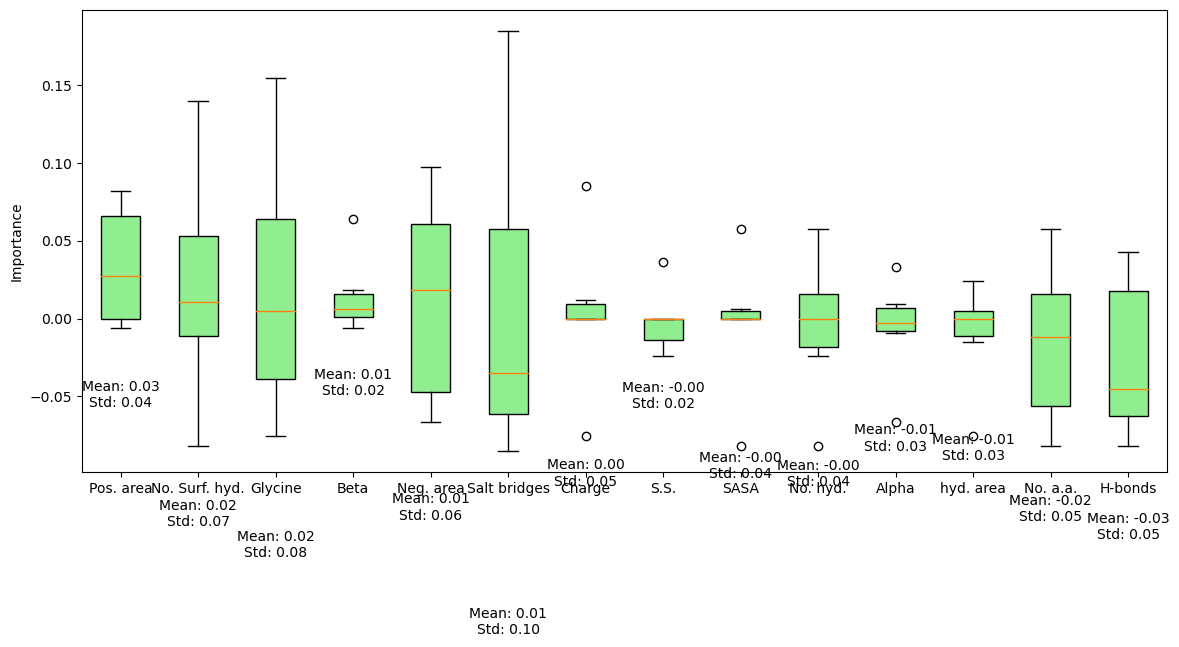

In [324]:
#plot feature importance 
plot_feature_importance(knn_data1[4])

In [325]:
np.mean(knn_data1[7]),np.mean(knn_data1[8])

(0.8385521885521888, 0.7575757575757577)

### 2.6 Logistic Regression

#### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [326]:
# pipeline for Logistic Regression
lr_pipeline = Pipeline([('scaler', StandardScaler()), 
                            ('lr', LogisticRegression( solver='liblinear', max_iter=5000))])

# parameter grid for Logistic Regression
lr_param_grid = {
    'lr__penalty': ['l1', 'l2'],#l1
    'lr__C': np.logspace(-4, 1, 10)#0.7742636826811278
}

# Call the  two_level_cv funcation with Logistic Regression pipeline, hyperperameter and data
lr_data1 = two_level_cv1(lr_pipeline, lr_param_grid, X, y)


In [327]:
#lr_data1

### 2.6.1 Feature importance for the Logistic Regression model.

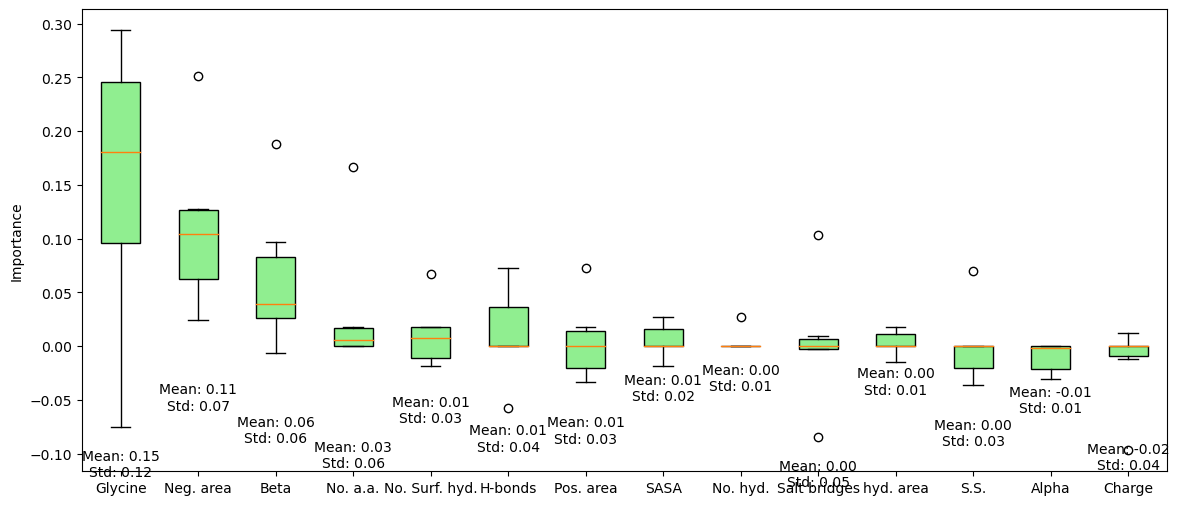

In [328]:
#plot feature importance 
plot_feature_importance(lr_data1[4])

In [432]:
#np.mean(lr_data1[7]),np.mean(lr_data1[8])

### 2.7 Support Vector Machine

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [330]:
# Define the pipeline for SVC
svc_pipeline = Pipeline([('scaler', StandardScaler()), 
                         ('svc', SVC())])

# hyperparameter grid for SVC
svc_param_grid = {
    'svc__C': list(range(1, 11)),
    'svc__kernel':["rbf","poly"],
    'svc__probability': [True]

}

# Call the  svc_returns_data1 funcation with pipeline, hyperperameter and data
svc_data1 = two_level_cv1(svc_pipeline, svc_param_grid, X, y)


In [331]:
#svc_data1

In [433]:
#np.mean(svc_data1[7]),np.mean(svc_data1[8])

### 2.7.1 Feature importance for SVC 

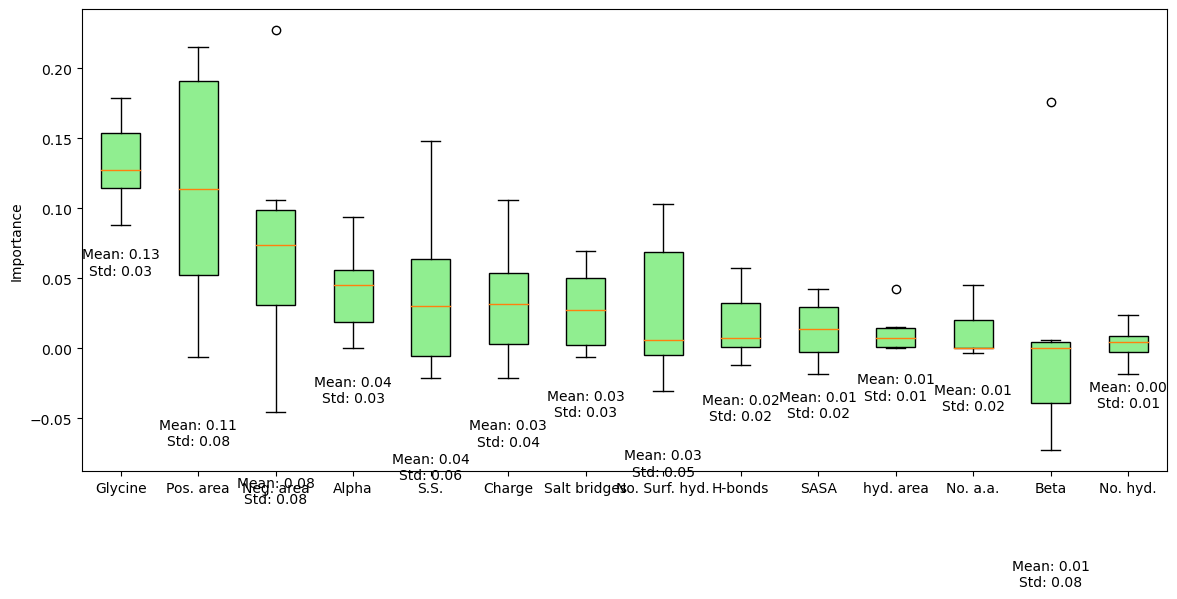

In [333]:
plot_feature_importance(svc_data1[4])


### 2.8 Random Forest

#### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.¶

In [334]:
# Define the pipeline for Random Forest
#
rf_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('rf', RandomForestClassifier(bootstrap=True, oob_score=True, criterion='gini', random_state=42))])

# hyperparameter grid for Random Forest
rf_param_grid = {
    'rf__max_depth': range(2, 5),
    'rf__max_features': range(3, 14)
}

# Call the  two_level_cv funcation with Random Forest pipeline, hyperperameter and data
rf_data1 =two_level_cv1(rf_pipeline, rf_param_grid, X, y)


In [335]:
np.mean(rf_data1[7]),np.mean(rf_data1[8])

(0.9636108560350983, 0.893939393939394)

### 2.8.1 Feature importance for the Random Forest model.

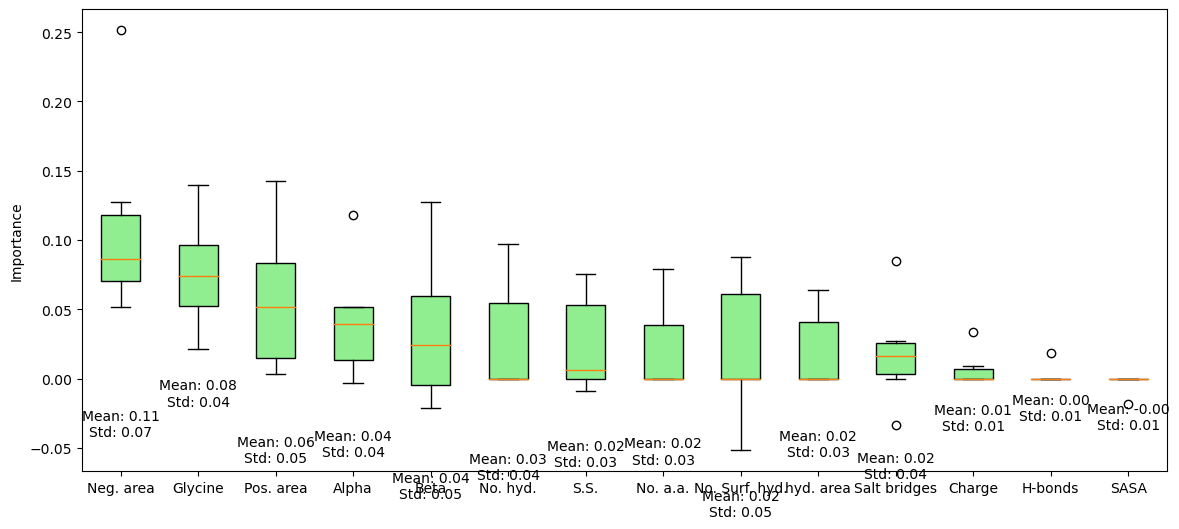

In [336]:
plot_feature_importance(rf_data1[4])


### 2.9 Confusion matrix Function

In [337]:
def plot_confusion_matrices(knn,lr,svc,rf):
    plt.figure(figsize=(16,8))
    plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

    ax = plt.subplot(2,4,1)
    plt.title("KNN")
    sns.heatmap(knn.astype(np.int64),annot=True,cmap="Blues",fmt="d",cbar=False)
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.xaxis.set_ticklabels(['Not Stable', 'Stable']);
    ax.yaxis.set_ticklabels(['Not Stable', 'Stable']);

    ax = plt.subplot(2,4,2)
    plt.title("Logistic Regression")
    sns.heatmap(lr.astype(np.int64),annot=True,cmap="Blues",fmt="d",cbar=False)
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.xaxis.set_ticklabels(['Not Stable', 'Stable']);
    ax.yaxis.set_ticklabels(['Not Stable', 'Stable']);



    ax= plt.subplot(2,4,3)
    plt.title("SVM")
    sns.heatmap(svc.astype(np.int64),annot=True,cmap="Blues",fmt="d",cbar=False)
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.xaxis.set_ticklabels(['Not Stable', 'Stable']);
    ax.yaxis.set_ticklabels(['Not Stable', 'Stable']);

    ax = plt.subplot(2,4,4)
    plt.title("Random Forest")
    sns.heatmap(rf.astype(np.int64),annot=True,cmap="Blues",fmt="d",cbar=False)
    ax.set_xlabel('Predicted');
    ax.set_ylabel('Actual'); 
    ax.xaxis.set_ticklabels(['Not Stable', 'Stable']);
    ax.yaxis.set_ticklabels(['Not Stable', 'Stable']);

    plt.show()



### 2.10 Confusion matrix for the Models applying on dataset 1

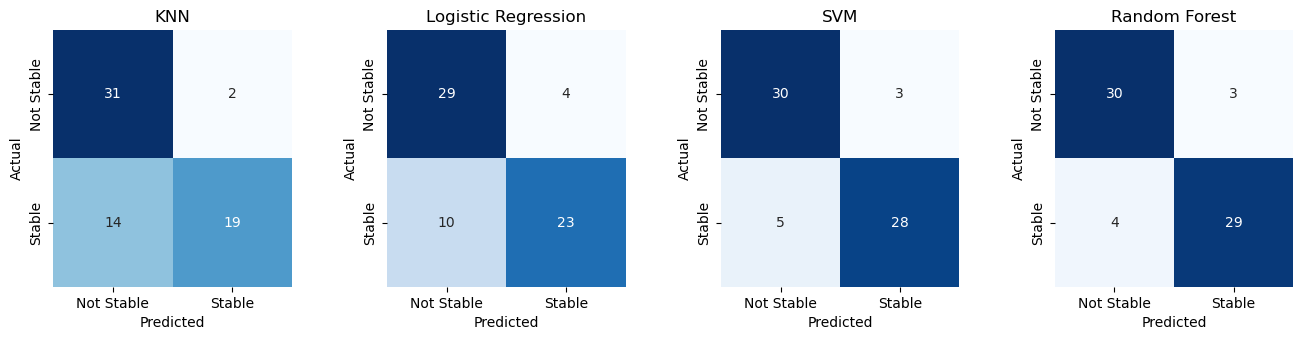

In [338]:
plot_confusion_matrices(knn_data1[0],lr_data1[0],svc_data1[0],rf_data1[0])

### 2.11 Roc curve for the models 

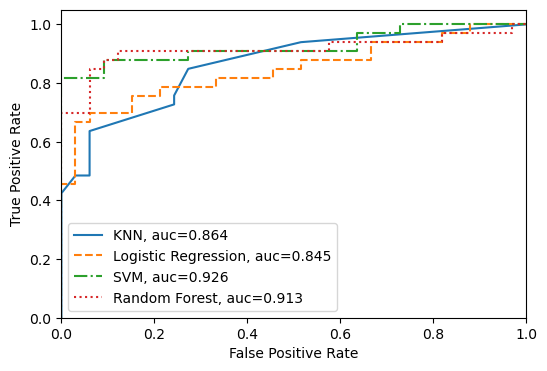

In [339]:
# plot the roc curve for the model
plt.figure(figsize=(6, 4))

plt.plot(knn_data1[1], knn_data1[2], marker='', ls='-' , label="KNN, auc="+str(float("{:.3f}".format(knn_data1[3]))) )
plt.plot(lr_data1[1], lr_data1[2], marker='', ls='--' , label="Logistic Regression, auc="+str(float("{:.3f}".format(lr_data1[3]))) )
plt.plot(svc_data1[1], svc_data1[2], marker='', ls='-.' , label="SVM, auc="+str(float("{:.3f}".format(svc_data1[3]))) )
plt.plot(rf_data1[1], rf_data1[2], marker='', ls=':' , label="Random Forest, auc="+str(float("{:.3f}".format(rf_data1[3]))) )


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('ROC Curve for the Models on datasets 1')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend()
plt.show()



### 2.12 Evaluation metrics(Accuracy, Recall, Precision and Specificity) 

In [340]:
confusion_mtrices = [knn_data1[0], lr_data1[0], svc_data1[0], rf_data1[0]]


model_names = ["KNN", "Logistic Regression", "SVM", "Random Forest"]

# Calculate the evaluation metrics from confusion matrices threshold  0.5
metrics = []

for model_name, conf_mt in zip(model_names, confusion_mtrices):
    
    # Extract the true negative, false positive, false negative and true positive
    tn, fp, fn, tp = conf_mt.ravel()
    
   # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    
    # Append to metrics
    metrics.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity
        
    })

 
# Convert to a pandas DataFrame
metrics_df1 = pd.DataFrame(metrics)
# Print the DataFrame
print(metrics_df1.to_string(index=False))


              Model  Accuracy   Recall  Precision  Specificity
                KNN  0.757576 0.575758   0.904762     0.939394
Logistic Regression  0.787879 0.696970   0.851852     0.878788
                SVM  0.878788 0.848485   0.903226     0.909091
      Random Forest  0.893939 0.878788   0.906250     0.909091


In [341]:
#results_df1.to_csv('metrics_df1.csv')


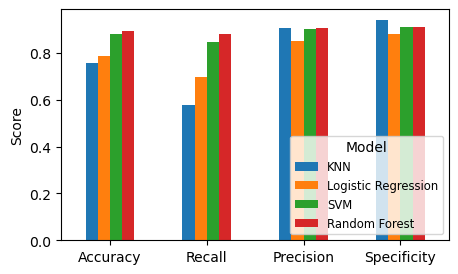

In [342]:


# Set the index to 'Model' 
metrics_df1.set_index('Model', inplace=True)

# Transpose the DataFrame for plotting
metrics_df1 = metrics_df1.T

# Create the grouped bar chart
ax = metrics_df1.plot(kind='bar', figsize=(5, 3))

# 
ax.set_ylabel('Score')
#ax.set_title('Model Performance Metrics')
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Model', fontsize='small', loc='lower right')

# Display the plot
plt.show()


### 2.13 McNemar's Tests between KNN with other models

In [343]:
def mcnemar_test(model, true_labels,pediction_labels):
    
    # empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model 1', 'Model 2', 'p-value'])
    
    for i in range(4):
        for j in range(i+1, 4):
            model1_name = model_names[i]
            model2_name = model_names[j]
            model1_preds = np.array(pediction_labels[i])
            model2_preds = np.array(pediction_labels[j])
            
            # Create the contingency table
            mcnemar_table_data = mcnemar_table(y_target=np.array(true_labels), 
                                               y_model1=model1_preds, 
                                               y_model2=model2_preds)

            # Calculate chi-squared & p-value
            chi2, p = mcnemar(ary=mcnemar_table_data, corrected=True)

            # Append p-value to the DataFrame
            results_df = results_df.append({'Model 1': model1_name,
                                            'Model 2': model2_name,
                                            'p-value': p}, ignore_index=True)

    return results_df


In [344]:

model_names = ["K-nearest neighbors", "Logistic Regression","Supprt Vector Machine", "Random Forest"]
pediction_labels = [knn_data1[6], lr_data1[6], svc_data1[6], rf_data1[6]]

results = mcnemar_test(model_names,knn_data1[5], pediction_labels)

 #Display the results
print(results.to_string(index=False))


              Model 1               Model 2  p-value
  K-nearest neighbors   Logistic Regression 0.789268
  K-nearest neighbors Supprt Vector Machine 0.061369
  K-nearest neighbors         Random Forest 0.015861
  Logistic Regression Supprt Vector Machine 0.077100
  Logistic Regression         Random Forest 0.096092
Supprt Vector Machine         Random Forest 1.000000


### 2.14 Train test accouracy

In [346]:
dict = {"models" : ['KNN', 'Logistic Regression', 'SVM', 'Random Forest'],
        "Avg_train_acc": [np.mean(knn_data1[7]),np.mean(lr_data1[7]), np.mean(svc_data1[7]), np.mean(rf_data1[7])],        
        "Avg_test_acc" : [np.mean(knn_data1[8]), np.mean(lr_data1[8]), np.mean(svc_data1[8]), np.mean(rf_data1[8])]}
 
df = pd.DataFrame(dict)
 
print(df.to_string(index=False))


             models  Avg_train_acc  Avg_test_acc
                KNN       0.838552      0.757576
Logistic Regression       0.706599      0.787879
                SVM       0.897166      0.893939
      Random Forest       0.963611      0.893939


# 3 ML Model training and validation with dataset 2

### 3.1 Extract the feature matrix and the target variable

In [388]:
X = X2_transformed
y = data['SDS Stable']

### 3.2 Balance the dataset by oversampling the minority class using SMOTE.

In [389]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#check the shape of the data after SMOTE if it balanced the dataset
print(X.shape,y.shape)
y.value_counts()

(66, 238) (66,)


0    33
1    33
Name: SDS Stable, dtype: int64

### 3.3  Nested two-level cross-validation function: the outer level for model validation and the inner level for model selection, where hyperparameter tuning takes place. The number of splits in the inner and outer folds is defined. Here, Leave-One-Out is used at the level and outer level k =6 fold

In [390]:

def two_level_cv2(model_pipeline, param_grid, X, y):
    
    """
    Inputs:
    model_pipeline (Pipeline): ML pipeline used.
    param_grid (dict): Hyperparameters for the pipeline.
    X (array): Feature data.
    y (array): Target data.

    Returns:
    confussion matrix: confussion matrix for the outer model validation whare model thereshold are set at 0.5.
    fpr (array): False Positive Rates determined from models predicted probability and actual class.
    tpr (array): True Positive Rates determined from models predicted probability and actual class.
    roc_auc (float): Area Under the ROC Curve determined from models predicted probability and actual class derived fpr and tpr.
    true_labels:Actual Class label of the data point
    pred_labels: Predicted class level of the data point at a threshold 0.5.
    inner_cv_train_acc: inner grid mean tranning accuracy
    test_acc: test accouracy 
    
    """  
    # Initiate the outer level k fold = 6 
    k= 6
    outer_cv = KFold(n_splits=k, shuffle=True, random_state=42)
      
    #define the empty lists to stor result 
    true_labels = []
    prediction_probs = []
    feature_imp = []
    inner_cv_train_acc = []
    test_acc = []
    
    # Splitting the dataset into training and testing for the outer loop
    for train_index, test_index in outer_cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

  
        # Initiate the inner level Leave-One-Out loop
        inner_loo = LeaveOneOut()


        # GridSearchCV for hyperparameter tuning and finding the best model with that in the inner loop
        inner_grid = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=inner_loo, n_jobs=-1, return_train_score=True)
        
        #fit the GridSearchCV on the training data of the split 
        inner_grid.fit(X_train, y_train)

        # Find the best model from inner loop with the gridsearch perameter ".best_estimator_" for the split data
        best_model = inner_grid.best_estimator_
         
        # Find the prediction probabilities of the model on positive class on the test data of the split
        probabilities = best_model.predict_proba(X_test)[:, 1]
            
        # Store the actual labels of the test data in for the split 
        true_labels.extend(y_test)
        
        #store the predicted probability of the class for the positive class for the test data point of that split
        prediction_probs.extend(probabilities)
        
  
        # get the mean tranning accouracy in the inner loop 
        inner_avg_train_accuracy = np.mean(inner_grid.cv_results_['mean_train_score'])
        
        #Store the mean tranning accouracy found in the inner loop 
        inner_cv_train_acc.append(inner_avg_train_accuracy)
        
        # get the test accouracy in the inner loop 
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
        # Store test accouracy in the inner loop 
        test_acc.append(test_accuracy)


    #calculating the fpr and tpr from from actual labels and  predicted probability
    fpr, tpr, _ = roc_curve(true_labels, prediction_probs)
    
    #find the area under the curve(auc)
    roc_auc = auc(fpr, tpr)
    
    #Convert the predicted probablity into class with the threshold 0.5 
    pred_labels = [1 if p > 0.5 else 0 for p in prediction_probs]

    #find the confussion matrix at threshold 0.5
    conf_matrix = confusion_matrix(true_labels, [1 if p > 0.5 else 0 for p in prediction_probs])

    #returans all the findinds
    return conf_matrix, fpr, tpr, roc_auc,true_labels,pred_labels,inner_cv_train_acc,test_acc


### 3.4  K-Nearest Neighbors

###  Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [391]:
# Define the pipeline for KNN
knn_pipeline = Pipeline([
    ('knn', KNeighborsClassifier())
])
# Define parameter grid for KNN
knn_param_grid = {
    
    'knn__n_neighbors': np.arange(3, 6),
    'knn__p': [1],
    'knn__metric': ['euclidean', 'manhattan']
}



# Call the  knn_2_level_cv funcation with pipeline, hyperperameter and data
knn_data2 = two_level_cv2(knn_pipeline, knn_param_grid, X, y)


In [392]:
np.mean(knn_data2[6]),np.mean(knn_data2[7])

(0.647334455667789, 0.4696969696969697)

### 3.5 Logistic Regression

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [393]:
# Define the pipeline for Logistic Regression
lr_pipeline = Pipeline([('scaler', StandardScaler()),                         
                        ('lr', LogisticRegression( solver='liblinear', max_iter=5000))])

# Define parameter grid for Logistic Regression
lr_param_grid = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-4, 1, 10)
}

#LogisticRegression(solver='saga', max_iter=5000, random_state=42)

# Call the  lr_2_level_cv funcation with pipeline, hyperperameter and data
lr_data2 = two_level_cv2(lr_pipeline, lr_param_grid, X, y)


In [394]:
#lr_data2

In [434]:
#np.mean(lr_data2[6]),np.mean(lr_data2[7])

### 3.6 Support Vector Machine

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [396]:
# Define the pipeline for SVC
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define parameter grid for SVC
svc_param_grid = {
    # Specify the values for the kernel


    'svc__C': list(range(1, 7)),
    'svc__kernel':["rbf"],
    'svc__probability': [True]

}

# Call the  svc_returns_data1 funcation with pipeline, hyperperameter and data
svc_data2 = two_level_cv2(svc_pipeline, svc_param_grid, X, y)


In [435]:
#np.mean(svc_data2[6]),np.mean(svc_data2[7])

###  3.7 Random Forest

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [398]:
# Define the pipeline for Random Forest

rf_pipeline = Pipeline([('scaler', StandardScaler()),    
                        ('rf', RandomForestClassifier(bootstrap=True, oob_score=True, criterion='gini', random_state=42))])

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__max_depth': range(2, 5),
    'rf__max_features': range(3, 7)
}

# Call the  svc_returns_data1 funcation with pipeline, hyperperameter and data
rf_data2 = two_level_cv2(rf_pipeline, rf_param_grid, X, y)


In [399]:
np.mean(rf_data2[6]),np.mean(rf_data2[7])

(0.9653900112233443, 0.5757575757575758)

### 3.8 Confusion matrix for the Models applying on dataset 1

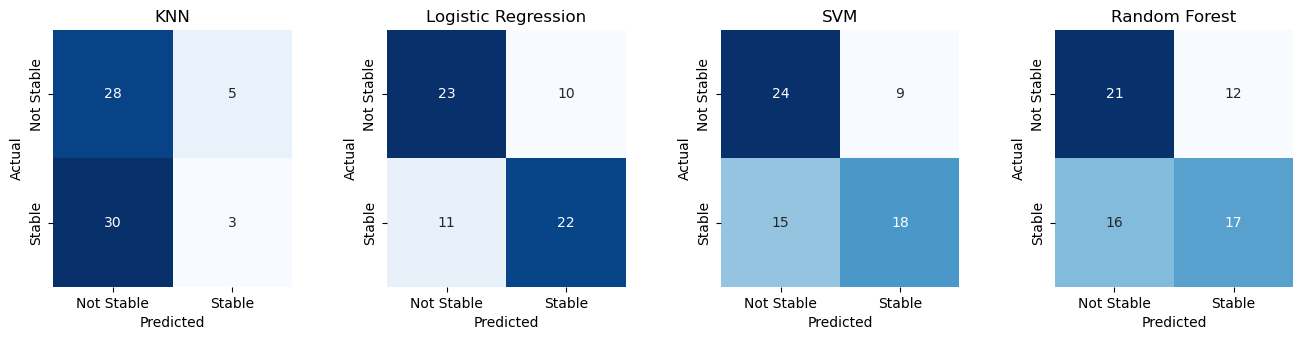

In [400]:
plot_confusion_matrices(knn_data2[0],lr_data2[0],svc_data2[0],rf_data2[0])

### 3.9 Roc curve for the models applying on dataset 2

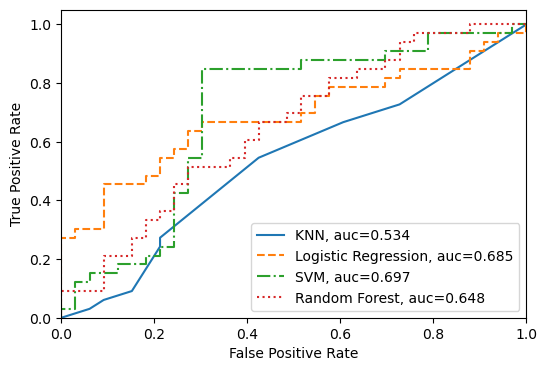

In [401]:
# plot the roc curve for the model
plt.figure(figsize=(6, 4))

plt.plot(knn_data2[1], knn_data2[2], marker='', ls='-' , label="KNN, auc="+str(float("{:.3f}".format(knn_data2[3]))) )
plt.plot(lr_data2[1], lr_data2[2], marker='', ls='--' , label="Logistic Regression, auc="+str(float("{:.3f}".format(lr_data2[3]))) )
plt.plot(svc_data2[1], svc_data2[2], marker='', ls='-.' , label="SVM, auc="+str(float("{:.3f}".format(svc_data2[3]))) )
plt.plot(rf_data2[1], rf_data2[2], marker='', ls=':' , label="Random Forest, auc="+str(float("{:.3f}".format(rf_data2[3]))) )


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curvefor Models on datasets 2')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend()
# show the plot
plt.show()
# magnima test 



### 3.10 Evaluation metrics(Accuracy, Recall, Precision and Specificity)

In [402]:
confusion_mtrices = [knn_data2[0], lr_data2[0], svc_data2[0], rf_data2[0]]
model_names = ["KNN", "Logistic Regression", "SVM", "Random Forest"]

# Calculate the evaluation metrics from confusion matrices threshold  0.5
metrics2 = []

for model_name, conf_mt in zip(model_names, confusion_mtrices):
    
    # Extract the true negative, false positive, false negative and true positive
    tn, fp, fn, tp = conf_mt.ravel()
    
   # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    
    # Append to metrics
    metrics2.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity
        
    })

 
# Convert to a pandas DataFrame
metrics_df2 = pd.DataFrame(metrics2)
# Print the DataFrame
print(metrics_df2.to_string(index=False))


              Model  Accuracy   Recall  Precision  Specificity
                KNN  0.469697 0.090909   0.375000     0.848485
Logistic Regression  0.681818 0.666667   0.687500     0.696970
                SVM  0.636364 0.545455   0.666667     0.727273
      Random Forest  0.575758 0.515152   0.586207     0.636364


In [403]:
#results_df12.to_csv('result_df2.csv')


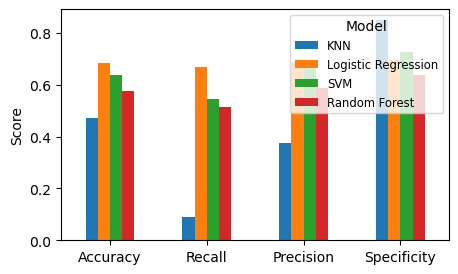

In [404]:

# Set the index to 'Model' 
metrics_df2.set_index('Model', inplace=True)

# Transpose the DataFrame for plotting
metrics_df2 = metrics_df2.T

# Create the grouped bar chart
ax = metrics_df2.plot(kind='bar', figsize=(5, 3))

# 
ax.set_ylabel('Score')
#ax.set_title('Model Performance Metrics')
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Model', fontsize='small', loc='upper right')

# Display the plot
plt.show()



### 3.11 McNemar's Tests between KNN with other models

In [405]:

def mcnemar_test(model, true_labels,pediction_labels):
    
    # empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model 1', 'Model 2', 'p-value'])
    
    for i in range(4):
        for j in range(i+1, 4):
            model1_name = model_names[i]
            model2_name = model_names[j]
            model1_preds = np.array(pediction_labels[i])
            model2_preds = np.array(pediction_labels[j])
            
            # Create the contingency table
            mcnemar_table_data = mcnemar_table(y_target=np.array(true_labels), 
                                               y_model1=model1_preds, 
                                               y_model2=model2_preds)

            # Calculate chi-squared & p-value
            chi2, p = mcnemar(ary=mcnemar_table_data, corrected=True)

            # Append p-value to the DataFrame
            results_df = results_df.append({'Model 1': model1_name,
                                            'Model 2': model2_name,
                                            'p-value': p}, ignore_index=True)

    return results_df

model_names = ["K-nearest neighbors", "Logistic Regression","Supprt Vector Machine", "Random Forest"]
pediction_labels = [knn_data2[5], lr_data2[5], svc_data2[5], rf_data2[5]]

results2 = mcnemar_test(model_names,knn_data2[4], pediction_labels)

print(results2.to_string(index=False))


              Model 1               Model 2  p-value
  K-nearest neighbors   Logistic Regression 0.010787
  K-nearest neighbors Supprt Vector Machine 0.021781
  K-nearest neighbors         Random Forest 0.190430
  Logistic Regression Supprt Vector Machine 0.546494
  Logistic Regression         Random Forest 0.045500
Supprt Vector Machine         Random Forest 0.288844


### 3.12 Train test accouracy

In [406]:
dict2 = {"models" : ['KNN', 'Logistic Regression', 'SVM', 'Random Forest'],
        "Avg_train_acc": [np.mean(knn_data2[6]),np.mean(lr_data2[6]), np.mean(svc_data2[6]), np.mean(rf_data2[6])],        
        "Avg_test_acc" : [np.mean(knn_data2[7]), np.mean(lr_data2[7]), np.mean(svc_data2[7]), np.mean(rf_data2[7])]}
 
df2 = pd.DataFrame(dict)
 
print(df2.to_string(index=False))


             models  Avg_train_acc  Avg_test_acc
                KNN       0.674027      0.469697
Logistic Regression       0.807581      0.696970
                SVM       0.945230      0.666667
      Random Forest       0.996493      0.712121


# 4 ML Model training and validation with dataset 3

### 4.1 Extract the feature matrix and the target variable

In [407]:
X = X2_transformed3
y = data['SDS Stable']

In [408]:
X.shape

(51, 238)

### 4.2 Balance the dataset by oversampling the minority class using SMOTE

In [409]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
#check the shape of the data after SMOTE if it balanced the dataset
print(X.shape,y.shape)
y.value_counts()

(66, 238) (66,)


0    33
1    33
Name: SDS Stable, dtype: int64

### 4.3 Nested two-level cross-validation function: the outer level for model validation and the inner level for model selection, where hyperparameter tuning takes place. The number of splits in the inner and outer folds is defined. Here, Leave-One-Out is used at the level and outer level k =6 fold

In [410]:

def two_level_cv3(model_pipeline, param_grid, X, y):
    
    """
    Inputs:
    model_pipeline (Pipeline): ML pipeline used.
    param_grid (dict): Hyperparameters for the pipeline.
    X (array): Feature data.
    y (array): Target data.

    Returns:
    confussion matrix: confussion matrix for the outer model validation whare model thereshold are set at 0.5.
    fpr (array): False Positive Rates determined from models predicted probability and actual class.
    tpr (array): True Positive Rates determined from models predicted probability and actual class.
    roc_auc (float): Area Under the ROC Curve determined from models predicted probability and actual class derived fpr and tpr.
    true_labels:Actual Class label of the data point
    pred_labels: Predicted class level of the data point at a threshold 0.5.
    inner_cv_train_acc: inner grid mean tranning accuracy
    test_acc: test accouracy 
    
    """  
    
    # Initiate the outer level k fold = 6 
    k= 6
    outer_cv = KFold(n_splits=k, shuffle=True, random_state=42)
    
    #define the empty lists to stor result 
    
    true_labels = []
    prediction_probs = []
    feature_imp = []
    inner_cv_train_acc = []
    test_acc = []
    
    # Splitting the dataset into training and testing for the outer loop
    for train_index, test_index in outer_cv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
         # Initiate the inner level Leave-One-Out loop
        inner_loo = LeaveOneOut()


        # GridSearchCV for hyperparameter tuning and finding the best model with that in the inner loop
        inner_grid = GridSearchCV(estimator=model_pipeline, param_grid=param_grid, cv=inner_loo, n_jobs=-1, return_train_score=True)
        
        #fit the GridSearchCV on the training data of the split 
        inner_grid.fit(X_train, y_train)

        # Find the best model from inner loop with the gridsearch perameter ".best_estimator_" for the split data
        best_model = inner_grid.best_estimator_
         
        # Find the prediction probabilities of the model on positive class on the test data of the split
        probabilities = best_model.predict_proba(X_test)[:, 1]
            
        # Store the actual labels of the test data in for the split 
        true_labels.extend(y_test)
        
        #store the predicted probability of the class for the positive class for the test data point of that split
        prediction_probs.extend(probabilities)
        
  
        # get the mean tranning accouracy in the inner loop 
        inner_avg_train_accuracy = np.mean(inner_grid.cv_results_['mean_train_score'])
        
        #Store the mean tranning accouracy found in the inner loop 
        inner_cv_train_acc.append(inner_avg_train_accuracy)
        
        # get the test accouracy in the inner loop 
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test))
        # Store test accouracy in the inner loop 
        test_acc.append(test_accuracy)


    #calculating the fpr and tpr from from actual labels and  predicted probability
    fpr, tpr, _ = roc_curve(true_labels, prediction_probs)
    
    #find the area under the curve(auc)
    roc_auc = auc(fpr, tpr)
    
    #Convert the predicted probablity into class with the threshold 0.5 
    pred_labels = [1 if p > 0.5 else 0 for p in prediction_probs]

    #find the confussion matrix at threshold 0.5
    conf_matrix = confusion_matrix(true_labels, [1 if p > 0.5 else 0 for p in prediction_probs])

    #returans all the findinds
    return conf_matrix, fpr, tpr, roc_auc,true_labels,pred_labels,inner_cv_train_acc,test_acc


### 4.4  K-Nearest Neighbors

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [411]:
# Define the pipeline for KNN
knn_pipeline = Pipeline([('scaler', StandardScaler()),
                       
                         ('knn', KNeighborsClassifier())])
# Define parameter grid for KNN
knn_param_grid = {

    
    'knn__n_neighbors': np.arange(3, 6),
    'knn__p': [1],
    'knn__metric': ['euclidean', 'manhattan']
}



# Call the  knn_2_level_cv funcation with pipeline, hyperperameter and data
knn_data3 = two_level_cv3(knn_pipeline, knn_param_grid, X, y)


In [412]:
#knn_data3

In [436]:
#np.mean(knn_data3[6]),np.mean(knn_data3[7])

### 4.5 Logistic Regression

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [414]:
# Define the pipeline for Logistic Regression
lr_pipeline = Pipeline([('scaler', StandardScaler()),                         
                 
                        ('lr', LogisticRegression( solver='liblinear', max_iter=5000))])

# Define parameter grid for Logistic Regression
lr_param_grid = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-4, 1, 10)
}


# Call the  lr_2_level_cv funcation with pipeline, hyperperameter and data
lr_data3 = two_level_cv3(lr_pipeline, lr_param_grid, X, y)


In [415]:
#lr_data3

In [437]:
#np.mean(lr_data3[6]),np.mean(lr_data3[7])

### 4.6 Support Vector Machine

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [417]:
# Define the pipeline for SVC
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Define parameter grid for SVC
svc_param_grid = {
    # Specify the values for the model
    'svc__C': list(range(1, 7)),
    'svc__kernel':["rbf"],
    'svc__probability': [True]
}

# Call the  svc_returns_data1 funcation with pipeline, hyperperameter and data
svc_data3 = two_level_cv3(svc_pipeline, svc_param_grid, X, y)


In [418]:
#svc_data3

In [419]:
np.mean(svc_data3[6]),np.mean(svc_data3[7])

(0.943462401795735, 0.712121212121212)

### 4.7 Random Forest

### Define the pipeline, hyperparameter grid, and determine the results of various validation metrics using two-level cross-validation.

In [420]:
# Define the pipeline for Random Forest
#
rf_pipeline = Pipeline([('scaler', StandardScaler()),    
                        ('rf', RandomForestClassifier(bootstrap=True, oob_score=True, criterion='gini', random_state=42))])

# Define parameter grid for Random Forest
rf_param_grid = {
    'rf__max_depth': [3,4],
    'rf__max_features': [3,4,5,6,7,9,11]
}

# Call the  svc_returns_data1 funcation with pipeline, hyperperameter and data
rf_data3 = two_level_cv3(rf_pipeline, rf_param_grid, X, y)


In [421]:
np.mean(rf_data3[6]),np.mean(rf_data3[7])

(0.9985610068943402, 0.6969696969696969)

### 4.8 Confusion matrix for the Models applying on dataset 3

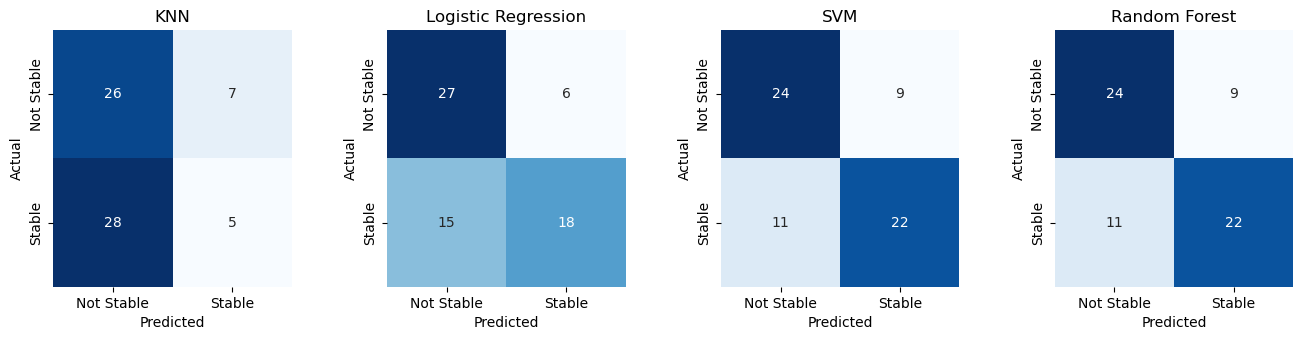

In [422]:
plot_confusion_matrices(knn_data3[0],lr_data3[0],svc_data3[0],rf_data3[0])

### 4.9 Roc curve for the models applying on dataset 3

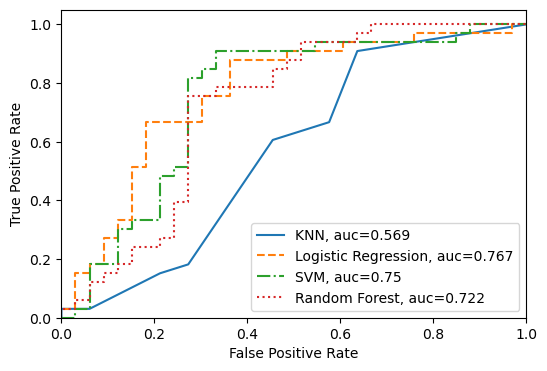

In [423]:
# plot the roc curve for the model
plt.figure(figsize=(6, 4))

plt.plot(knn_data3[1], knn_data3[2], marker='', ls='-' , label="KNN, auc="+str(float("{:.3f}".format(knn_data3[3]))) )
plt.plot(lr_data3[1], lr_data3[2], marker='', ls='--' , label="Logistic Regression, auc="+str(float("{:.3f}".format(lr_data3[3]))) )
plt.plot(svc_data3[1], svc_data3[2], marker='', ls='-.' , label="SVM, auc="+str(float("{:.3f}".format(svc_data3[3]))) )
plt.plot(rf_data3[1], rf_data3[2], marker='', ls=':' , label="Random Forest, auc="+str(float("{:.3f}".format(rf_data3[3]))) )


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curvefor Models on datasets 2')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend()
# show the plot
plt.show()
# magnima test 



### 4.10 Evaluation metrics(Accuracy, Recall, Precision and Specificity)

In [424]:
confusion_mtrices = [knn_data3[0],lr_data3[0],svc_data3[0],rf_data3[0]]
model_names = ["KNN", "Logistic Regression", "SVM", "Random Forest"]

# Calculate the evaluation metrics from confusion matrices threshold  0.5
metrics3 = []

for model_name, conf_mt in zip(model_names, confusion_mtrices):
    
    # Extract the true negative, false positive, false negative and true positive
    tn, fp, fn, tp = conf_mt.ravel()
    
   # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    specificity = tn / (tn + fp)
    
    # Append to metrics
    metrics3.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'Specificity': specificity
        
    })

 
# Convert to a pandas DataFrame
metrics_df3 = pd.DataFrame(metrics3)
# Print the DataFrame
print(metrics_df3.to_string(index=False))


              Model  Accuracy   Recall  Precision  Specificity
                KNN  0.469697 0.151515   0.416667     0.787879
Logistic Regression  0.681818 0.545455   0.750000     0.818182
                SVM  0.696970 0.666667   0.709677     0.727273
      Random Forest  0.696970 0.666667   0.709677     0.727273


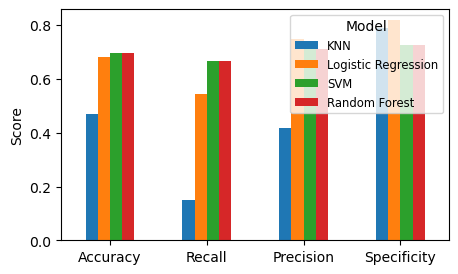

In [425]:

# Set the index to 'Model' 
metrics_df3.set_index('Model', inplace=True)

# Transpose the DataFrame for plotting
metrics_df3 = metrics_df3.T

# Create the grouped bar chart
ax = metrics_df3.plot(kind='bar', figsize=(5, 3))

# 
ax.set_ylabel('Score')
#ax.set_title('Model Performance Metrics')
plt.xticks(rotation=0)

# Add legend
plt.legend(title='Model', fontsize='small', loc='upper right')

# Display the plot
plt.show()



In [426]:
#plot_metrics(results_df3)


### 4.11 McNemar's Tests between KNN with other models

In [427]:

def mcnemar_test(model, true_labels,pediction_labels):
    
    # empty DataFrame to store the results
    results_df = pd.DataFrame(columns=['Model 1', 'Model 2', 'p-value'])
    
    for i in range(4):
        for j in range(i+1, 4):
            model1_name = model_names[i]
            model2_name = model_names[j]
            model1_preds = np.array(pediction_labels[i])
            model2_preds = np.array(pediction_labels[j])
            
            # Create the contingency table
            mcnemar_table_data = mcnemar_table(y_target=np.array(true_labels), 
                                               y_model1=model1_preds, 
                                               y_model2=model2_preds)

            # Calculate chi-squared & p-value
            chi2, p = mcnemar(ary=mcnemar_table_data, corrected=True)

            # Append p-value to the DataFrame
            results_df = results_df.append({'Model 1': model1_name,
                                            'Model 2': model2_name,
                                            'p-value': p}, ignore_index=True)

    return results_df

model_names = ["K-nearest neighbors", "Logistic Regression","Supprt Vector Machine", "Random Forest"]
pediction_labels = [knn_data3[5], lr_data3[5], svc_data3[5], rf_data3[5]]

results3 = mcnemar_test(model_names,knn_data3[4], pediction_labels)

 #Display the results as a table
print(results3)


                 Model 1                Model 2   p-value
0    K-nearest neighbors    Logistic Regression  0.001154
1    K-nearest neighbors  Supprt Vector Machine  0.003509
2    K-nearest neighbors          Random Forest  0.003509
3    Logistic Regression  Supprt Vector Machine  1.000000
4    Logistic Regression          Random Forest  1.000000
5  Supprt Vector Machine          Random Forest  0.000000


###  4.12 Train test accouracy

In [428]:
dict = {"models" : ['KNN', 'Logistic Regression', 'SVM', 'Random Forest'],
        "Avg_train_acc": [np.mean(knn_data3[6]),np.mean(lr_data3[6]), np.mean(svc_data3[6]), np.mean(rf_data3[6])],        
        "Avg_test_acc" : [np.mean(knn_data3[7]), np.mean(lr_data3[7]), np.mean(svc_data3[7]), np.mean(rf_data3[7])]}
 
df = pd.DataFrame(dict)
 
print(df.to_string(index=False))


             models  Avg_train_acc  Avg_test_acc
                KNN       0.682061      0.469697
Logistic Regression       0.811052      0.681818
                SVM       0.943462      0.712121
      Random Forest       0.998561      0.696970


## 